# Effect of lambda on Test Accuracy of fMnist & MNIST datasets

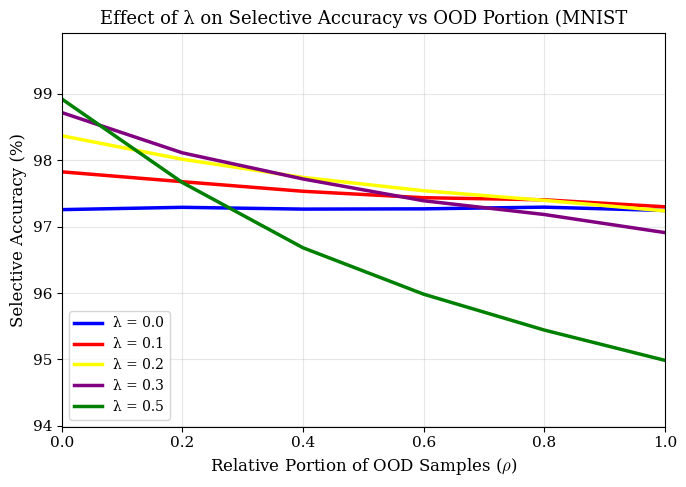

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
dataset_name = "MNIST"

list_mnist_datasets = [
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.0/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.0.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.1/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.1.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.2/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.2.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.3/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.3.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.5/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.5.csv",
]

# --- LOAD AND COMBINE ---
df_list = [pd.read_csv(path) for path in list_mnist_datasets]
df_combined = pd.concat(df_list, ignore_index=True)

# Normalize column names for consistency
df_combined.rename(columns={'lambda_split': 'lambda'}, inplace=True)



# --- PLOT SETTINGS ---
lambda_order = [0.0, 0.1, 0.2, 0.3, 0.5]
color_map = {
    0.0: 'Blue',   # Blue (The lowest line, representing standard FedAvg)
    0.1: 'Red',   # Red/Dark Orange (A highly effective line, near the top)
    0.2: 'yellow',   # Yellow/Mustard (A highly effective line, near the top, used for the main result)
    0.3: 'purple',   # Purple/Violet (Slightly lower than lambda=0.1/0.2, still good generalization)
    0.5: 'Green',   # Green (The line that drops sharply, showing over-personalization)
}
plt.figure(figsize=(7, 5))

# --- MAIN LOOP: plot selective accuracy vs OOD ratio ---
for lam in lambda_order:
    if lam in df_combined['lambda'].unique():
        df_lam = df_combined[df_combined['lambda'] == lam].sort_values('p')
        color = color_map.get(lam, None)
        plt.plot(df_lam['p'], df_lam['selective_acc'], label=f'λ = {lam}', linewidth=2.5, color=color)

# --- AXES & STYLE ---
plt.xlabel(r'Relative Portion of OOD Samples ($\rho$)', fontsize=12)
plt.ylabel('Selective Accuracy (%)', fontsize=12)
plt.title(f'Effect of λ on Selective Accuracy vs OOD Portion ({dataset_name}', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, title=None, loc='lower left')
plt.xlim(0, 1)
plt.ylim(df_combined['selective_acc'].min() - 1, df_combined['selective_acc'].max() + 1)
plt.tight_layout()

# --- SAVE PLOTS ---
plt.savefig(f'{dataset_name}_lambda_vs_ood_selective_accuracy.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{dataset_name}_lambda_vs_ood_selective_accuracy.pdf', bbox_inches='tight')
plt.show()


In [66]:
df_fmnist_combined

,p,full_acc,client_acc,selective_acc,gamma,lambda,eth
0,0.0,82.130000,81.370000,81.460000,0.5,0.0,2.3
1,0.2,82.060000,81.290833,81.371667,0.5,0.0,2.3
2,0.4,82.141429,81.395000,81.454286,0.5,0.0,2.3
3,0.6,82.175000,81.468750,81.550000,0.5,0.0,2.3
4,0.8,82.233889,81.406111,81.501667,0.5,0.0,2.3
5,1.0,82.010500,81.239500,81.328500,0.5,0.0,2.3
6,0.0,84.725000,89.367000,89.088000,0.5,0.1,2.3
7,0.2,83.750833,87.283333,87.080000,0.5,0.1,2.3
8,0.4,83.260714,85.967857,85.803571,0.5,0.1,2.3
9,0.6,82.861250,84.978750,84.871250,0.5,0.1,2.3


# Effect of lambda on Test Accuracy of FMNIST datasets


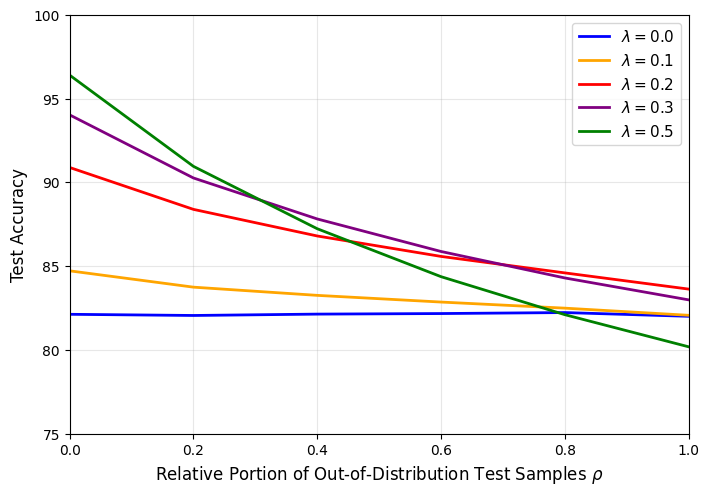